In [1]:
!unzip MNIST_1.zip

Streaming output truncated to the last 5000 lines.
 extracting: MNIST/Train/3/4377.png  
 extracting: MNIST/Train/3/0507.png  
 extracting: MNIST/Train/3/2257.png  
 extracting: MNIST/Train/3/1555.png  
 extracting: MNIST/Train/3/1828.png  
 extracting: MNIST/Train/3/1524.png  
 extracting: MNIST/Train/3/1536.png  
 extracting: MNIST/Train/3/5820.png  
 extracting: MNIST/Train/3/0515.png  
 extracting: MNIST/Train/3/4932.png  
  inflating: MNIST/Train/3/4447.png  
 extracting: MNIST/Train/3/3688.png  
 extracting: MNIST/Train/3/5083.png  
  inflating: MNIST/Train/3/4215.png  
 extracting: MNIST/Train/3/2399.png  
  inflating: MNIST/Train/3/2048.png  
 extracting: MNIST/Train/3/5498.png  
 extracting: MNIST/Train/3/2793.png  
 extracting: MNIST/Train/3/1894.png  
 extracting: MNIST/Train/3/0639.png  
 extracting: MNIST/Train/3/2822.png  
 extracting: MNIST/Train/3/0828.png  
 extracting: MNIST/Train/3/1292.png  
 extracting: MNIST/Train/3/5985.png  
 extracting: MNIST/Train/3/3052.png  

In [2]:
import numpy as np
import imageio
import glob

def load_mnist():
    # Loads the MNIST dataset from png images

    NUM_LABELS = 10
    # create list of image objects
    test_images = []
    test_labels = []

    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Test/" + str(label) + "/*.png"):
            image = imageio.imread(image_path)
            test_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]
            letter[label] = 1
            test_labels.append(letter)

    # create list of image objects
    train_images = []
    train_labels = []

    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Train/" + str(label) + "/*.png"):
            image = imageio.imread(image_path)
            train_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]
            letter[label] = 1
            train_labels.append(letter)

    X_train= np.array(train_images).reshape(-1,784)/255.0
    Y_train= np.array(train_labels)
    X_test= np.array(test_images).reshape(-1,784)/255.0
    Y_test= np.array(test_labels)

    return X_train, Y_train, X_test, Y_test

In [204]:
X_train,Y_train,X_test,Y_test = load_mnist()

<ipython-input-2-fdf5f0f0b592>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
<ipython-input-2-fdf5f0f0b592>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


In [205]:
print("X_train shape = ", X_train.shape)
print("Y_train shape = ", Y_train.shape)
print("X_test shape = ", X_test.shape)
print("Y_test shape = ", Y_test.shape)


X_train shape =  (60000, 784)
Y_train shape =  (60000, 10)
X_test shape =  (10000, 784)
Y_test shape =  (10000, 10)


In [206]:
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

In [207]:

def init_params(X_train,Y_train):
  #w1 has to be shape 784,10
  #w1 = np.random.normal(0,0.01,(X_train.shape[1],10))
  w1 = np.random.randn(X_train.shape[1], 10) * 0.01
  b1 = np.zeros((Y_train.shape[1],1))
  return w1,b1

In [208]:
import numpy as np

def relu(Z):
  return np.maximum(0,Z)

def softmax(Z):
  exp_Z = np.exp(Z)
  exp_Z_sum = np.sum(exp_Z, axis=1, keepdims=True)
  return exp_Z / exp_Z_sum

In [209]:
def linear_forward(X_train,w,b):
  z = np.dot(X_train,w) + b.T
  return z

In [210]:
def activation_forward(z):
  return relu(z)

In [211]:

def model_forward(X_train,w1,b1):

  #First layer
  z1 = linear_forward(X_train,w1,b1)
  h1 = activation_forward(z1)

  #cache creation is explained in later functions, but cache will have the form of (Z,w,b,X)
  cache = (h1,w1,b1,X_train)
  h2 = softmax(h1)

  return h2,cache

In [212]:
def compute_loss(Z,Y_train):
#So, Y_train is of shape (60k,10) so each row consists of 0-9 cells, with 1 on the index where the correct label for the digit is
#Also, Z has shape (60k,10) as well. Z_i symbolises (1,10), so one example. So, sum (e^Z_i_l) from l=1 until M, we basically add for a single sample the columns
  #print(Z.shape,Y_train.shape)
  max_values = np.max(Z, axis=1, keepdims=True)
  stable_values = Z - max_values
  exp_values = np.exp(stable_values)
  row_sums = np.sum(exp_values, axis=1)
  L = np.log(row_sums)
  L = L - np.sum(Y_train*Z,axis=1) #(60k,10),(10,60k) --> 60k,60k ->60k,1
  J = (1/Y_train.shape[0])*(np.sum(L))
  return J

In [213]:
def linear_backward(dl_dz,cache):
  #Based on test in class:
  #Lets say Z is the linear output of a layer and dl/dz is the gradient of the loss in respect to output Z. To propagate that backwards we do :
  #print("Checking X in linear backward", X)
  Z, W, b, X = cache

  #print(f"lets check: X = {X} , X.shape = {X.shape} , dl_dz = {dl_dz}, dl_dz.shape = {dl_dz.shape}")
  dl_dw= np.dot(X.T, dl_dz)
  #print("My dl_dw is :," , dl_dw.shape)
  #Here is the problem

  #dl_dw= np.dot(X, dl_dz)
  dl_db = np.sum(dl_dz, axis=0, keepdims=True).T
  # print("my dl_db shape is :",dl_db.shape)
  return dl_dw,dl_db

In [214]:
def relu_backward(dl_da,Z):
  #If the value of the input of relu is positive, then the partial derivative of the loss over the relu is 1, else 0
  #dl_da is gradient of loss function of the output of the relu
  #Z is input of relu fucntion


  return dl_da*(Z>0) #Basically if Z>0 then return dl_da otherwise return 0


In [215]:
def activation_backward(dl_da,cache):

  Z, W, b,X = cache

  #print("My X is :",X)
  #dl_da is the gradient with respect to the final output
  dl_dz = relu_backward(dl_da, Z)
  #print("My dl_dz is :",dl_dz)
  dl_dw,dl_db = linear_backward(dl_dz, cache)
  #print("dl_dw shape, dl_db shape :",dl_dw,dl_db)
  return dl_dw,dl_db

In [216]:
def model_backward(y_pred,Y_train,cache):

  dl_da = (y_pred-Y_train)*1/(y_pred.shape[1])

  dl_dw,dl_db = activation_backward(dl_da,cache)

  return dl_dw,dl_db

In [217]:
def update_parameters(cache,dl_dw,dl_db,alpha):

  w1 = cache[1] - alpha*(dl_dw)
  b1 = cache[2] - alpha*(dl_db)
  return w1,b1

In [218]:
def compute_accuracy(y_pred, y_mini):

  predictions = np.argmax(y_pred, axis=1)  # Get predicted class from softmax output
  correct_labels = np.argmax(y_mini, axis=1)  # Get true class labels

  correct_predictions = np.sum(predictions == correct_labels)
  accuracy = correct_predictions / y_mini.shape[0]  # Percentage of correct predictions
  return accuracy

In [219]:
def predict(X_train,Y_train,w1,b1):

  y_pred , _ = model_forward(X_train,w1,b1)
  J = compute_loss(y_pred,Y_train)
  accuracy = compute_accuracy(y_pred,Y_train)

  return y_pred,J,accuracy



In [220]:
def random_mini_batches(X, Y, batch_size=64, seed=42):

  np.random.seed(seed)  # Ensure reproducibility

  m = X.shape[0]  # Number of training examples
  mini_batches = []  # Will store our mini-batches

  # Shuffle data (X and Y should be shuffled together)
  permutation = list(np.random.permutation(m))
  X_shuffled = X[permutation, :]
  #print("X",X)
  Y_shuffled = Y[permutation, :]

  # Partition into mini-batches
  num_complete_batches = m // batch_size
  for k in range(num_complete_batches):
    start = k * batch_size
    end = start + batch_size
    x_mini = X_shuffled[start:end, :]
    y_mini = Y_shuffled[start:end, :]
    yield x_mini, y_mini

  # Handling the last (possibly smaller) mini-batch
  if m % batch_size != 0:
    start = num_complete_batches * batch_size
    end = m
    x_mini = X_shuffled[start:end, :]
    y_mini = Y_shuffled[start:end, :]
    yield x_mini, y_mini


In [221]:
def train_model(X_train,Y_train,epochs,learning_rate,batch_size):
  losses = []
  acc = []
  losses_test = []
  acc_test = []
  w1,b1 = init_params(X_train,Y_train)

  for epoch in range(epochs):
    print("Epoch :",epoch)
    mini_batches = random_mini_batches(X_train, Y_train, batch_size)


    for i,(x_mini, y_mini) in enumerate(mini_batches):
      # Train model on each mini_batch


      y_pred , cache = model_forward(x_mini,w1,b1)

      #print(f"Prediction at step {step} : ",z)
      #Compute the loss

      #Compute partial derivatives
      dl_dw,dl_db = model_backward(y_pred,y_mini,cache)

      #Update parameters
      w1,b1 = update_parameters(cache,dl_dw,dl_db,learning_rate)

    J = compute_loss(y_pred,y_mini) #cache[1][0] is z2
    losses.append(J)
    accuracy = compute_accuracy(y_pred,y_mini)
    acc.append(accuracy)
    print("Accuracy on train set = ",accuracy)
    print(f'Loss at step {i} of training set : ',J)
    _,J_test,accuracy_test= predict(X_test,Y_test,w1,b1)
    losses_test.append(J_test)
    acc_test.append(accuracy_test)
    print("Accuracy on test set = ",accuracy_test)
    print(f'Loss at step {i} of test set : ',J_test)



  return w1,b1,y_pred,losses,acc,losses_test,acc_test

In [222]:
epochs = 100
learning_rate = 0.01
batch_size = 128


w1,b1,y_pred,losses,acc,losses_test,acc_test = train_model(X_train,Y_train,epochs,learning_rate,batch_size)

Epoch : 0
Accuracy on train set =  0.90625
Loss at step 468 of training set :  0.8022078666820667
Accuracy on test set =  0.9031
Loss at step 468 of test set :  0.8179349721151105
Epoch : 1
Accuracy on train set =  0.90625
Loss at step 468 of training set :  0.749722275306576
Accuracy on test set =  0.9104
Loss at step 468 of test set :  0.75980156691605
Epoch : 2
Accuracy on train set =  0.90625
Loss at step 468 of training set :  0.7298776452292073
Accuracy on test set =  0.9142
Loss at step 468 of test set :  0.7354635245559324
Epoch : 3
Accuracy on train set =  0.9166666666666666
Loss at step 468 of training set :  0.7186012900625862
Accuracy on test set =  0.9174
Loss at step 468 of test set :  0.7212171651097903
Epoch : 4
Accuracy on train set =  0.9166666666666666
Loss at step 468 of training set :  0.7111968978787871
Accuracy on test set =  0.9184
Loss at step 468 of test set :  0.7115321279021952
Epoch : 5
Accuracy on train set =  0.9166666666666666
Loss at step 468 of trainin

In [60]:
y_pred,J,accuracy= predict(X_test,Y_test,w1,b1)
print(accuracy)

0.9275


In [223]:
from matplotlib import pyplot as plt
import numpy as np
def training_curve_plot(title, train_losses, test_losses, train_accuracy, test_accuracy):

  lg=13
  md=10
  sm=9
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))
  fig.suptitle(title, fontsize=lg)
  x = range(1, len(train_losses)+1)
  axs[0].plot(x, train_losses, label=f'Final train loss: {train_losses[-1]:.4f}')
  axs[0].plot(x, test_losses, label=f'Final test loss: {test_losses[-1]:.4f}')
  axs[0].set_title('Losses', fontsize=md)
  axs[0].set_xlabel('Iteration', fontsize=md)
  axs[0].set_ylabel('Loss', fontsize=md)
  axs[0].legend(fontsize=sm)
  axs[0].tick_params(axis='both', labelsize=sm)
  # Optionally use a logarithmic y-scale
  #axs[0].set_yscale('log')
  axs[0].grid(True, which="both", linestyle='--', linewidth=0.5)
  axs[1].plot(x, train_accuracy, label=f'Final train accuracy: {train_accuracy[-1]:.4f}%')
  axs[1].plot(x, test_accuracy, label=f'Final test accuracy: {test_accuracy[-1]:.4f}%')
  axs[1].set_title('Accuracy', fontsize=md)
  axs[1].set_xlabel('Iteration', fontsize=md)
  axs[1].set_ylabel('Accuracy (%)', fontsize=sm)
  axs[1].legend(fontsize=sm)
  axs[1].tick_params(axis='both', labelsize=sm)
  axs[1].grid(True, which="both", linestyle='--', linewidth=0.5)
  plt.show()

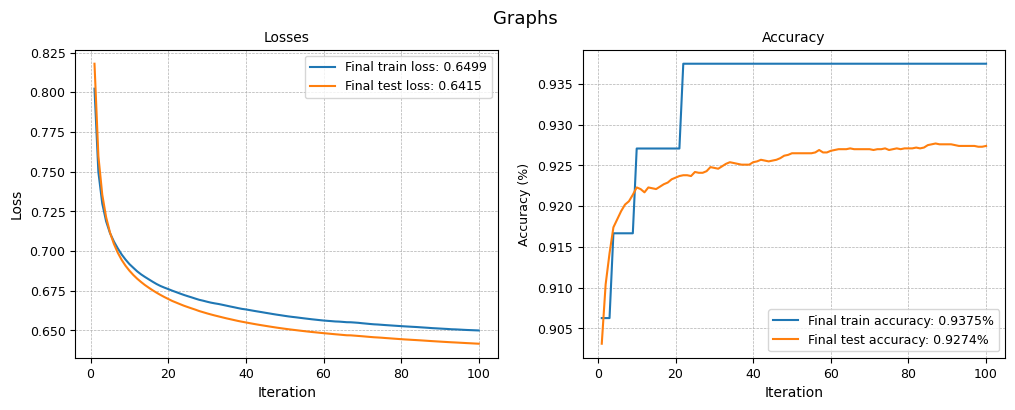

In [227]:
training_curve_plot("Graphs",losses,losses_test,acc,acc_test)

In [225]:
w1 =w1.reshape((28,28,10))

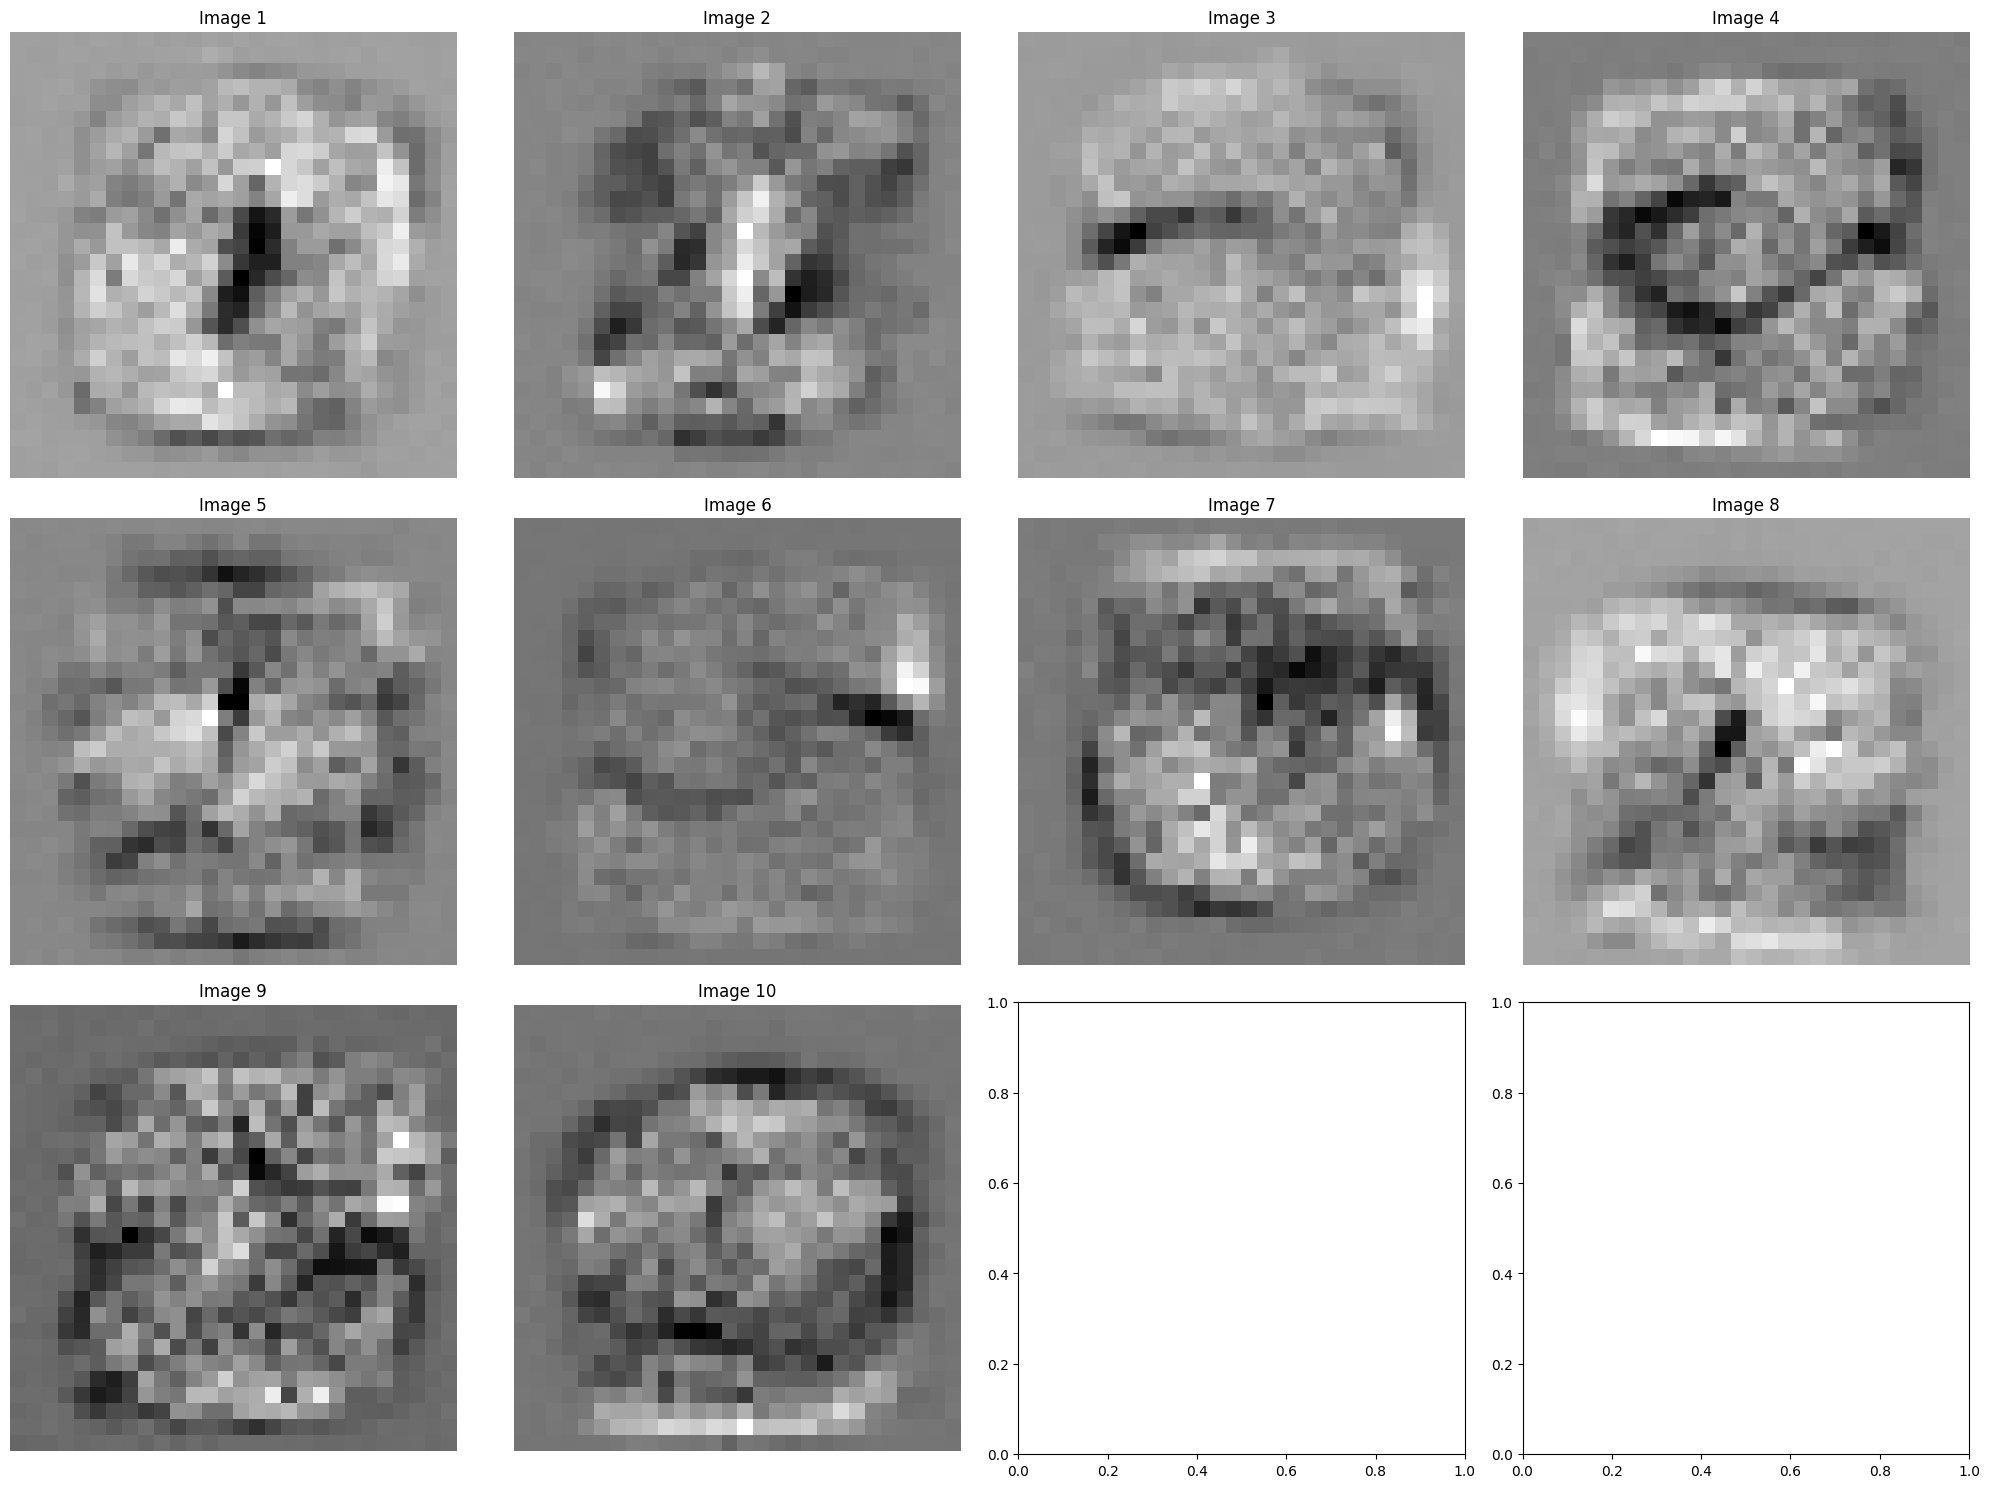

In [231]:
import matplotlib.pyplot as plt
import numpy as np

# ... your w1 matrix ...

num_images = w1.shape[2]
cols = int(np.ceil(np.sqrt(num_images)))
rows = int(np.ceil(num_images / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))

for i in range(num_images):
    if i < w1.shape[2]:
        img = w1[:, :, i]
        ax = axes.flat[i]
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Image {i+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()

